# COMMUNICATION OF RESULTS

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

data_file_name='real_state_coruña_final.pickle'

path= '../../02_Data/03_Final/' + data_file_name

properties_data = pd.read_pickle(path)
properties_data=properties_data.loc[properties_data.m2 <=150]


## ANALYSIS CONTEXT

We have selected the city of La Coruña as a candidate to search for properties to invest in with the goal of achieving profitability through long-term rental housing.

To do this, we will first conduct a Discovery analysis that allows us to identify strategies or lines of work to help direct our property search. At the same time, we will create a dashboard that provides a clear view of the characteristics of this market and a filter to identify potential properties that align with our investment criteria.

## OBJECTIVES

* Locate the districts with the highest percentage of gross profitability.
* Filter the provided property list by setting an upper limit for initial investment capital. For this calculation, we estimate an 80% mortgage financing rate.

## EXECUTIVE CONCLUSIONS

* Properties larger than 150 m² should be excluded.
* It is recommended to search for properties with a maximum of 5 rooms.
* It is recommended to search for properties between 51 and 100 m².
* Focus should be placed on the districts of Elviña - A Zapateira and Paseo de los Puentes.

## DETAILS OF MAIN RESULTS

### Properties larger than 150 m² should be excluded

* The estimated rent for each property is calculated using the following formula: average price per m² of the district x property size in m².
* This leads to an incorrect rental price calculation for properties with statistically atypical sizes (over 200 m²), distorting subsequent analyses.
* Since the 75th percentile for property size is 140 m², we will only consider properties smaller than 150 m² (applying the discretization ranges).

Exhibit 1.5.1

In [22]:
properties_data.groupby('m2_disc').estimated_rental_price.describe().iloc[:,-5:]

,min,25%,50%,75%,max
m2_disc,,,,,
01_up_to_50_m2,392.0,457.50,510.0,576.0,700.0
02_between_51_and_100_m2,550.0,758.25,900.0,1034.0,1400.0
03_between_101_and_150_m2,1020.0,1234.00,1430.0,1708.0,2100.0


In [23]:
properties_data[['m2']].describe().T.iloc[:,-5:]

,min,25%,50%,75%,max
m2,28.0,74.0,93.0,117.0,150.0


### It is recommended to search for properties with a maximum of 5 rooms

* There is a linear progression between the number of rooms and the rental price, with prices starting to decrease after 6 rooms.

Exhibit 1.5.2

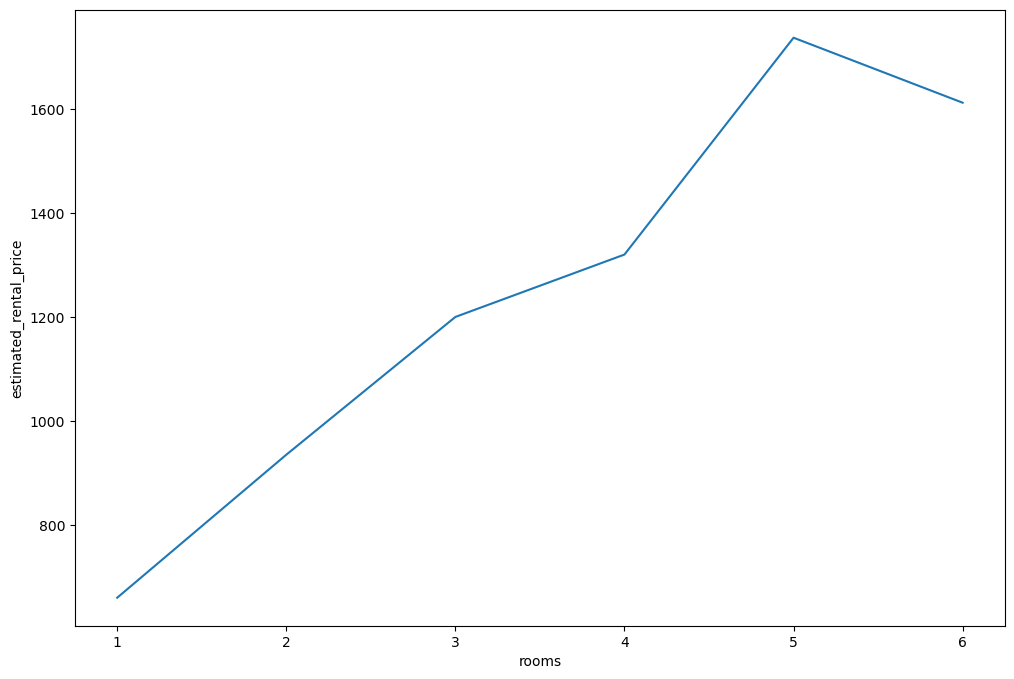

In [24]:
properties_data=properties_data.loc[properties_data.m2 <=150]
temp=properties_data.groupby('rooms')[['estimated_rental_price','rooms']].median()

plt.figure(figsize = (12,8))
sns.lineplot(data = temp, x = 'rooms', y = 'estimated_rental_price')
plt.show();

### It is recommended to search for properties between 51 and 100 m²

* These maximize the relationship between rent and purchase price.

Exhibit 1.5.3

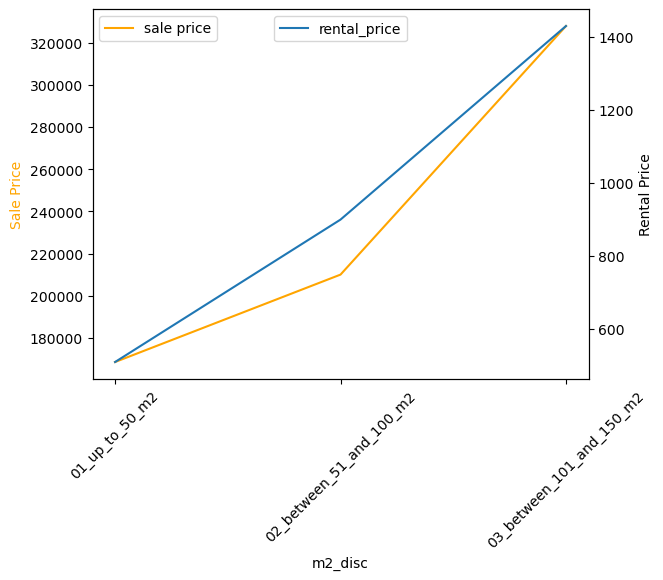

In [25]:
temp = properties_data.groupby('m2_disc')[['sale_price', 'estimated_rental_price']].median()

fig, ax1 = plt.subplots()

a = sns.lineplot(data=temp, x='m2_disc', y='sale_price', color='orange', label='sale price', ax=ax1)
ax1.set_xlabel('m2_disc') 
ax1.set_ylabel('Sale Price', color='orange') 

ax2 = ax1.twinx()
b = sns.lineplot(data=temp, x='m2_disc', y='estimated_rental_price', label='rental_price', ax=ax2)
ax2.set_ylabel('Rental Price')  

ax1.tick_params(axis='x', rotation=45)  
ax1.set_xticks(temp.index)  

ax2.legend(loc='upper center')
plt.show()

### It is recommended to focus on the districts of Elviña - A Zapateira and Paseo de los Puentes

* Focusing exclusively on gross profitability, we should look for opportunities in the following districts.

Exhibit 1.5.4

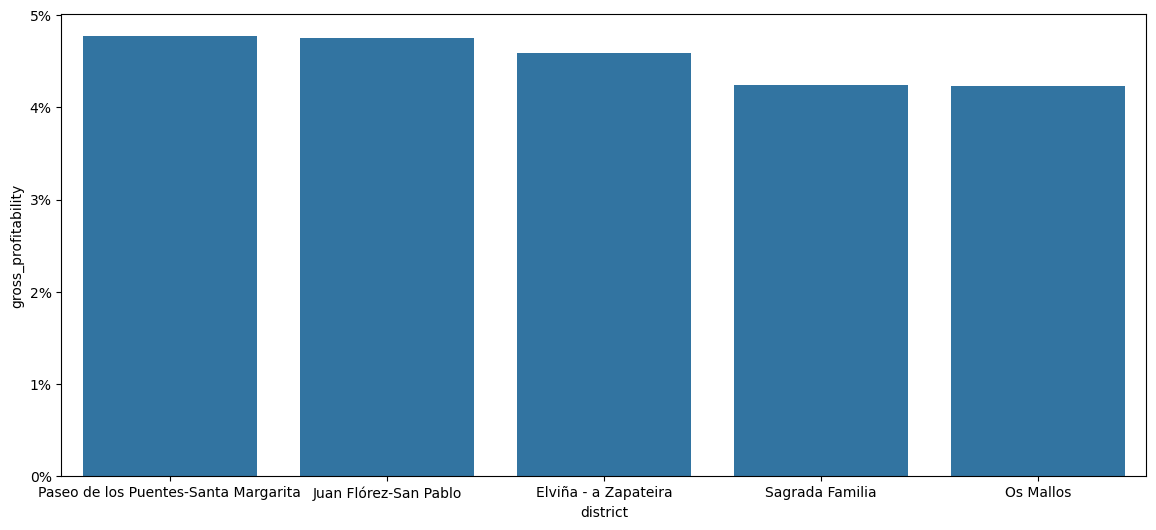

In [26]:
temp=properties_data.groupby('district')[['gross_profitability']].mean().sort_values(by='gross_profitability',ascending=False).head(5)

plt.figure(figsize = (14,6))
g=sns.barplot(data = temp, x = 'district', y = 'gross_profitability')
vals = g.get_yticks()
g.set_yticklabels(['{:.0%}'.format(val) for val in vals])
plt.show();

* However, if we take into account the goal of achieving the highest profitability at the lowest possible purchase price, the scenario changes, with Elviña - A Zapateira and Paseo de los puentes - Santa Margarita emerging as the best options.

Exhibit 1.5.4

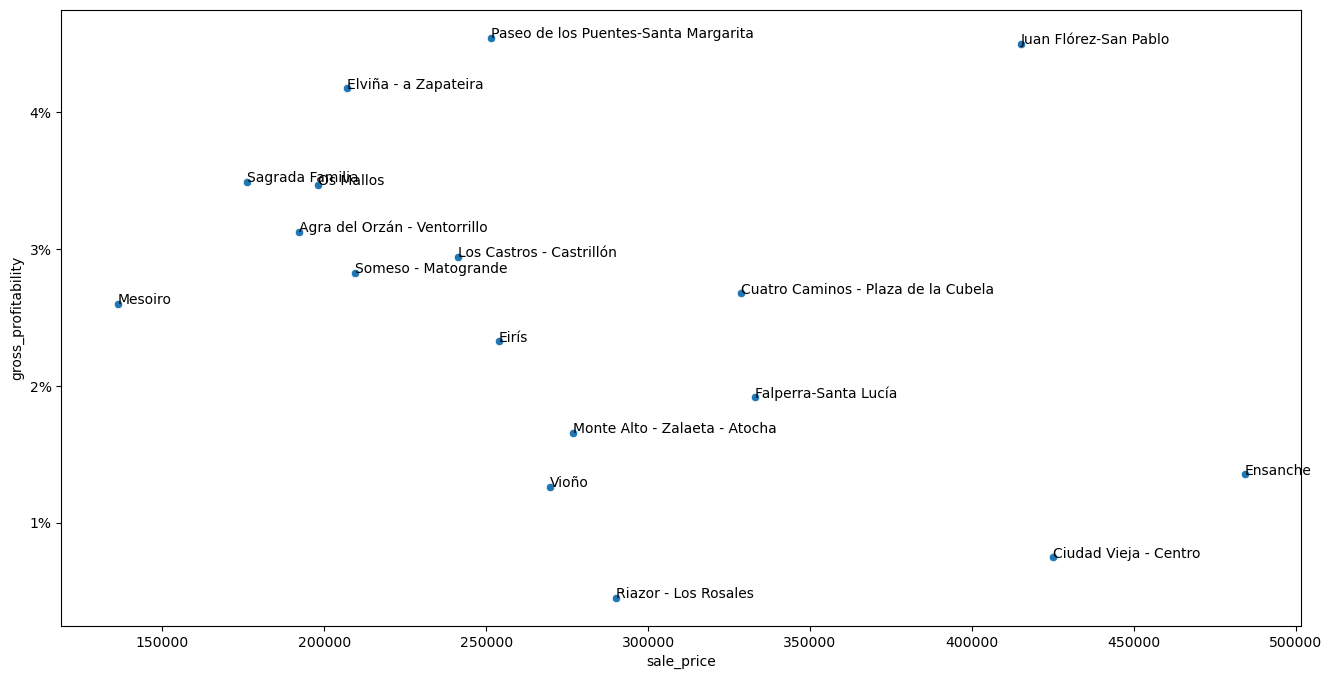

In [27]:
temp=properties_data.groupby('district')[['sale_price','gross_profitability']].mean()

plt.figure(figsize = (16,8))
g=sns.scatterplot(data = temp, x = 'sale_price', y = 'gross_profitability')

for each in range(0,temp.shape[0]):
    plt.text(temp.sale_price.iloc[each], temp.gross_profitability.iloc[each], temp.index[each])
    
g.set_yticklabels(['{:.0%}'.format(val) for val in vals])
plt.show();

In [28]:
temp=properties_data.groupby(['district','m2_disc'])['gross_profitability'].mean().reset_index().sort_values(by='gross_profitability',ascending=False).round(2).head(10)

temp['gross_profitability']=(temp.gross_profitability*100).astype(str)+"%"

temp.loc[temp.district.isin(['Elviña - a Zapateira','Paseo de los Puentes-Santa Margarita'])]

,district,m2_disc,gross_profitability
33,Paseo de los Puentes-Santa Margarita,03_between_101_and_150_m2,5.0%
12,Elviña - a Zapateira,02_between_51_and_100_m2,5.0%
32,Paseo de los Puentes-Santa Margarita,02_between_51_and_100_m2,5.0%


* Although we can find exceptions in other districts that provide similar profitability with a lower selling price.

In [29]:

temp=properties_data.groupby(['district','m2_disc'])['gross_profitability'].mean().reset_index().sort_values(by='gross_profitability',ascending=False).round(2)


districts=properties_data.groupby('district').sale_price.mean().sort_values()[:4].reset_index().district.to_list()


mean_profitability=properties_data.loc[properties_data.district=='Elviña - a Zapateira'].gross_profitability.mean().round(2)


temp=temp.loc[temp.district.isin(districts) & (temp.gross_profitability >= mean_profitability)]
temp['gross_profitability']=(temp.gross_profitability*100).astype(str)+"%"

temp

,district,m2_disc,gross_profitability
31,Os Mallos,03_between_101_and_150_m2,5.0%
39,Sagrada Familia,03_between_101_and_150_m2,5.0%
